In [1]:
## In this Notebook 
# analysis types of customers and help to increse sales
# clean it ,build model and predict types of customer

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

df=pd.read_csv(r"d:\New folder\data science-project\New folder\customer_shopping_data.csv")
print(df.head())
# - here see first 5rows of each columns


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [3]:
print(df.info())
# - see types of columns and their information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [4]:
print(df.describe(include='all'))
# - each columns proper discription


       invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN         8           NaN   
top       I138884     C241288  Female           NaN  Clothing           NaN   
freq            1           1   59482           NaN     34487           NaN   
mean          NaN         NaN     NaN     43.427089       NaN      3.003429   
std           NaN         NaN     NaN     14.990054       NaN      1.413025   
min           NaN         NaN     NaN     18.000000       NaN      1.000000   
25%           NaN         NaN     NaN     30.000000       NaN      2.000000   
50%           NaN         NaN     NaN     43.000000       NaN      3.000000   
75%           NaN         NaN     NaN     56.000000       NaN      4.000000   
max           NaN         NaN     NaN     69.000000       NaN      5.000000   

               price payment_method invoice_date   

In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


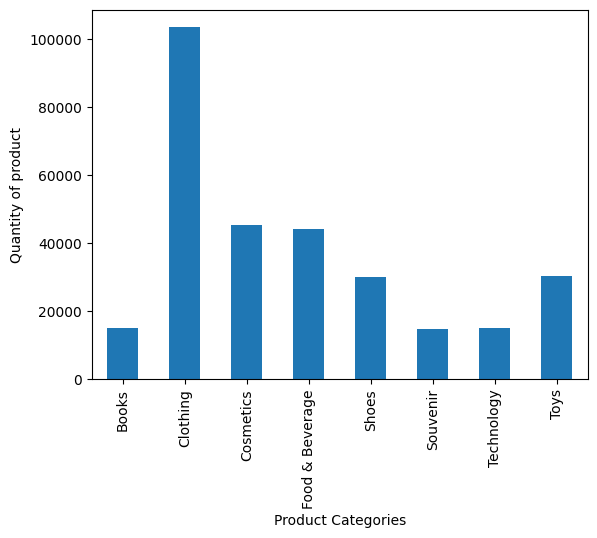

In [7]:
df.groupby("category")["quantity"].sum().plot(kind="bar")
plt.xlabel("Product Categories")
plt.ylabel("Quantity of product")
plt.show()

The highest selling item is clothes
then most selling item is costmetics & Food Beverage
in least selling item included books,technology,souvenir

gender
Female    59482
Male      39975
Name: count, dtype: int64


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085
Male,2075,13835,6027,5972,4067,1982,2015,4002


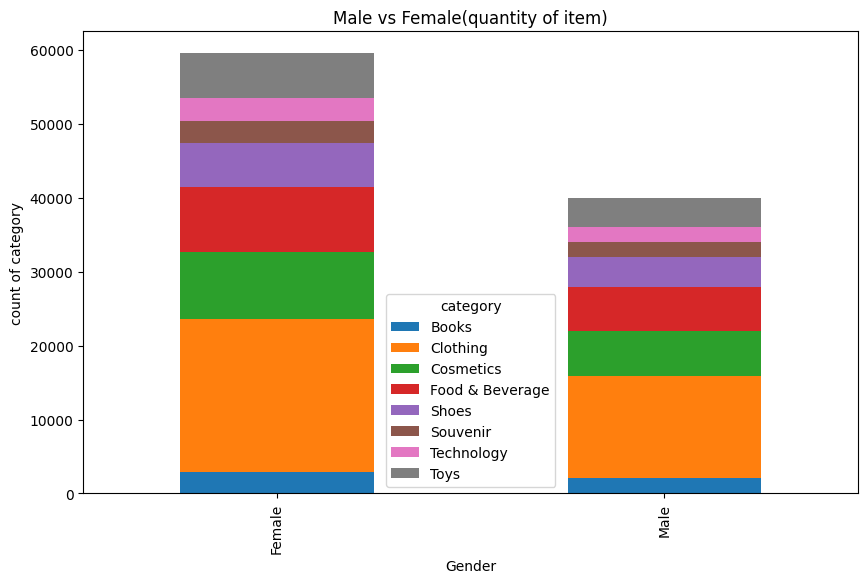

In [8]:
df.groupby(["gender","category"])["customer_id"].count().unstack().plot(kind="bar",stacked=True,figsize=(10,6))
plt.xlabel("Gender")
plt.ylabel("count of category")
plt.title("Male vs Female(quantity of item)")
print(df["gender"].value_counts())
df.groupby(["gender","category"])["customer_id"].count().unstack()

Females do more shopping then males or thats too in every category
still we see that males are less in number yet they buy approximately equal number of books,technology,shoes,toys
overall
men & women  both spend most of their money on clothes , cosmetics,  Food & Beverage,Toys,
but in category of books ,toys and technology men are more intrested than women


<Axes: xlabel='age', ylabel='Count'>

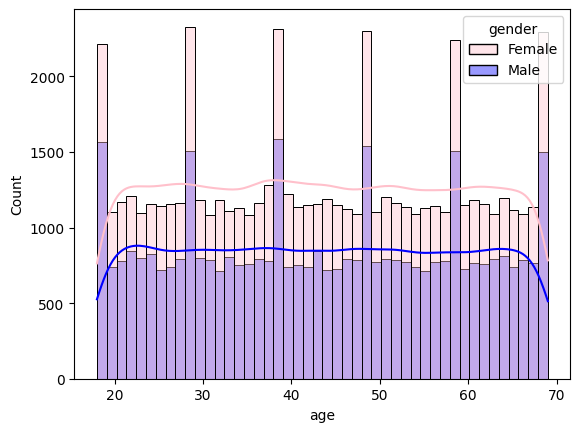

In [9]:
sns.histplot(data=df,x="age",hue="gender",kde=True,palette={"Male":"blue","Female":"pink"},alpha=0.4)

the graph show that while coustmer count is distributed fairly broadly across the ages 20 to 70 the 
coustomer base is heavily skewed towards feamales in every age category 

<Axes: xlabel='age'>

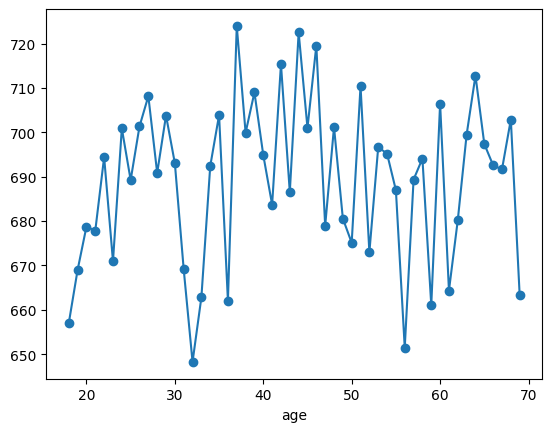

In [50]:
df.groupby("age")["price"].mean().plot(kind="line",marker='o')

here we can seen yong age group spending average money might be they seen offer or trending items also
or mild age group people spending high might be they want quality 
old group also spending average 

Text(0, 0.5, 'Average price')

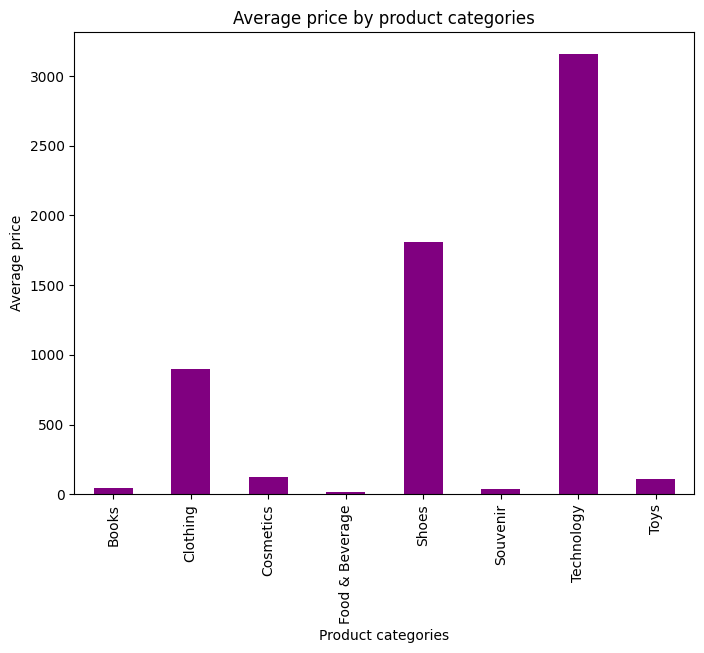

In [10]:
plt.figure(figsize=(8,6))
df.groupby("category")["price"].mean().plot(kind="bar",color="purple",title="Average price by product categories")
plt.xlabel("Product categories")
plt.ylabel("Average price")

the graph show that most expansive catagory is Technology then shoes or then clothsand 
the average price of other category is even less then 500 rs

Text(0, 0.5, 'Total sales per amount per month')

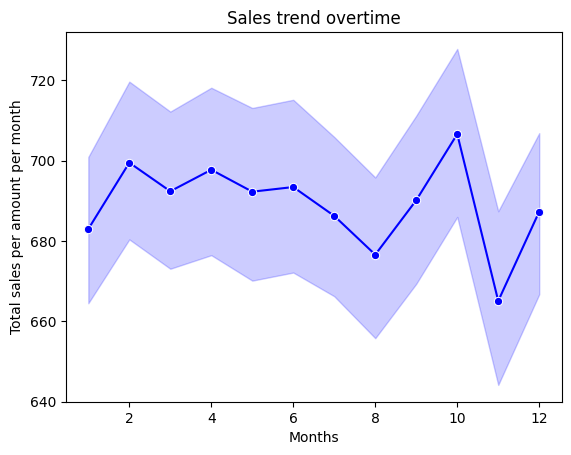

In [11]:
df["invoice_date"]= pd.to_datetime(df["invoice_date"],format="mixed")
df["year"]= df["invoice_date"].dt.year
df["Month"]=df["invoice_date"].dt.month
sns.lineplot(x=df["Month"],y=df["price"],marker="o",color="b",)
plt.title("Sales trend overtime")
plt.xlabel("Months")
plt.ylabel("Total sales per amount per month")

if we calculate the average price month by month ,we can seen how sales move over time  this show
the sales trend - 
in this graph show that 
from month1 to 6 ,sales are almost stable
then 6 to 8 months keep going down
after that  8 to 10 months  sales rise continuously  
10th month has highest sales 
in the  11 month's sale drop again
then finally in the 12 th month , sales become stable 

   year       price
0  2021  935.364446
1  2022  945.084970
2  2023  951.242694


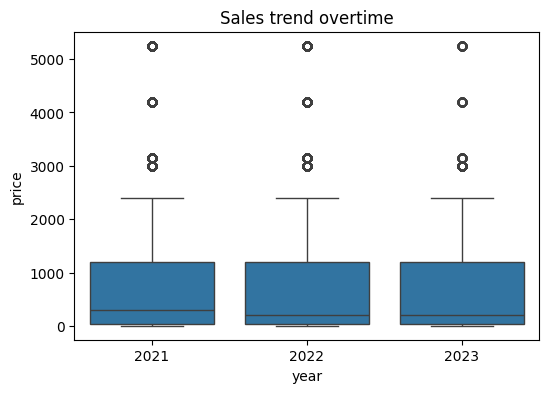

In [12]:
plt.figure(figsize=(6,4))
yearly_sales= df.groupby("year")["price"].std().reset_index()
sns.boxplot(data=df,x='year',y='price')
#plt.xticks(yearly_sales['year'])
plt.title("Sales trend overtime")
print(yearly_sales)

Across 2021-2022-2023 ,all average sales and the various  remained nearly constant .
this indicated a stable trend with no significant gain or loss in customer spending

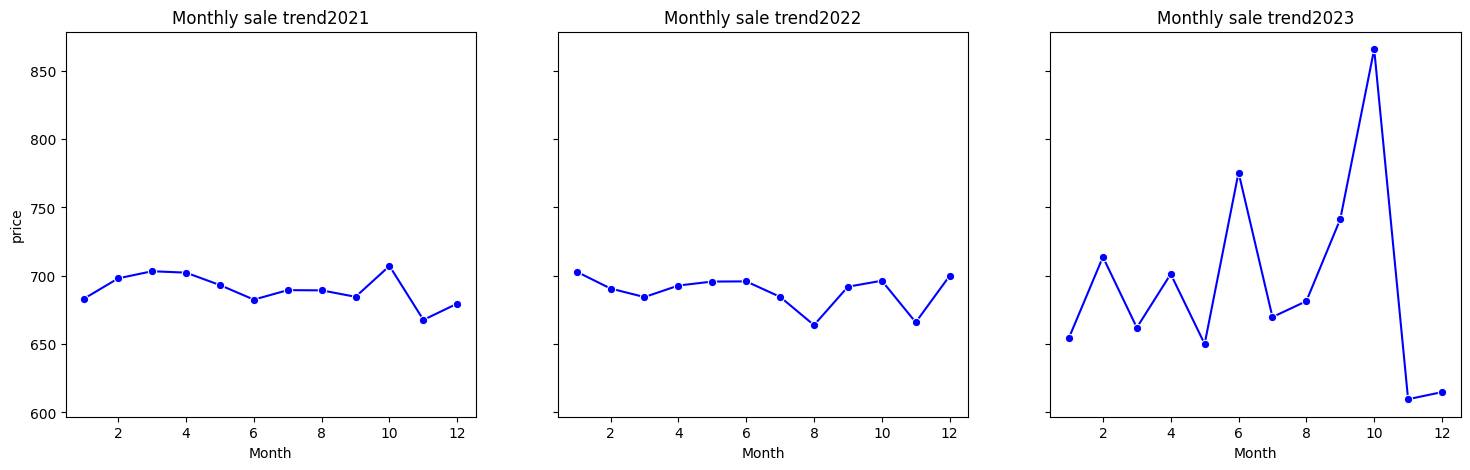

In [13]:
monthly_sales=df.groupby(["year","Month"])["price"].mean().reset_index()
years=[2021,2022,2023]
fig,axes=plt.subplots(1,3,figsize=(18,5),sharex=True,sharey=True)
for i ,year in enumerate(years):
    data_year=monthly_sales[monthly_sales['year']==year]
    sns.lineplot(data=data_year,x="Month",y="price",color='b',marker="o",ax=axes[i])
    axes[i].set_title(f"Monthly sale trend{year}")

Here the monthly sales trend of each year separately here we eaily compare each trend 
we already know by boxplot here nothing big variation or average also ~ same but 
in 2023 highest sales and lower sales are both present 
commen in all 3 year was 10 month give high sale trend or 11 month have maximum chances of lower trend

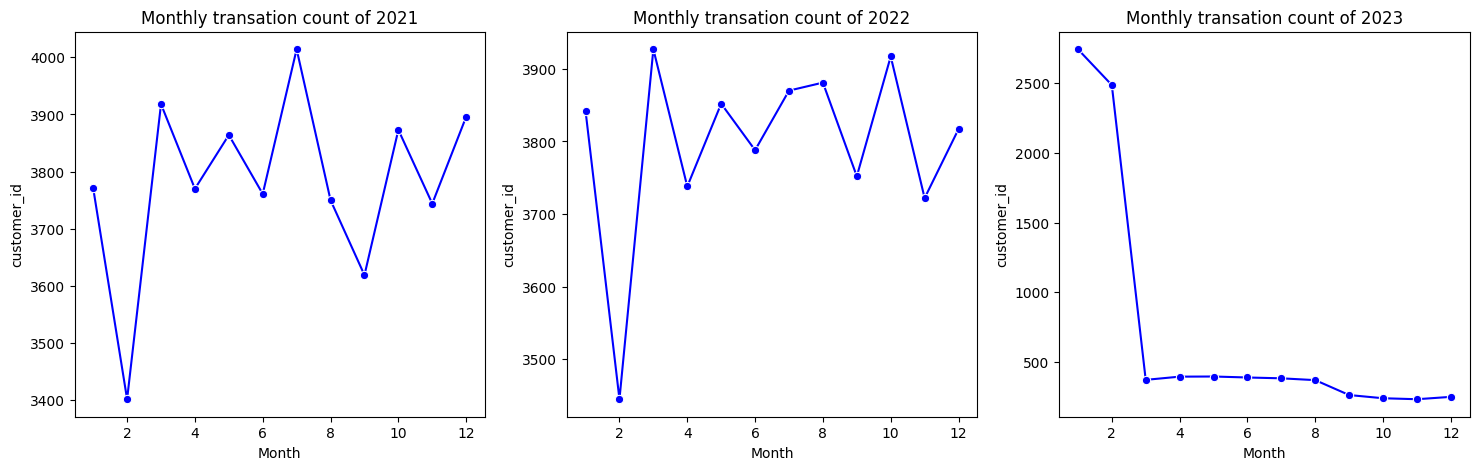

In [14]:
monthly_sales=df.groupby(["year","Month"])["customer_id"].count().reset_index()
years=[2021,2022,2023]
fig,axes=plt.subplots(1,3,figsize=(18,5))
for i ,year in enumerate(years):
    data_year=monthly_sales[monthly_sales['year']==year]
    sns.lineplot(data=data_year,x="Month",y="customer_id",color='b',marker="o",ax=axes[i])
    axes[i].set_title(f"Monthly transation count of {year}")

from graph we seen count of transaction is almost simillar but in 2023
transation count is too much low 
let's see which factor affect 
is it product range in 2023 to much high ?
any drametic issue 

In [15]:
monthly_sales=df[df["year"]==2023]
sale_2023=monthly_sales.groupby("Month").agg(total_sales=("price","sum"),transation_count=("price","count")).reset_index()
sale_2023["avg_price_per_transation"]=(sale_2023["total_sales"]/sale_2023["transation_count"])
print(sale_2023)

yearly_sales=df.groupby("year").agg(total_sales=("price","sum"),transation_count=("price","count")).reset_index()
yearly_sales["avg_price_per_transation"]=(yearly_sales["total_sales"]/yearly_sales["transation_count"])
yearly_sales

    Month  total_sales  transation_count  avg_price_per_transation
0       1   1796920.94              2745                654.616007
1       2   1775770.11              2488                713.733967
2       3    246276.50               372                662.033602
3       4    276995.69               395                701.254911
4       5    257420.54               396                650.051869
5       6    301680.27               389                775.527686
6       7    256520.43               383                669.766136
7       8    252117.95               370                681.399865
8       9    194996.06               263                741.429886
9      10    207778.80               240                865.745000
10     11    142045.14               233                609.635794
11     12    153712.67               250                614.850680


,year,total_sales,transation_count,avg_price_per_transation
0,2021,31316304.63,45382,690.060038
1,2022,31372826.18,45551,688.740668
2,2023,5862235.10,8524,687.732884


here we see average price of product is ~similar by privious year
so range of price is not high
total sale or count of coustmer gradually decrease
total sale of 2023 is also too much low 

<Axes: xlabel='payment_method', ylabel='count'>

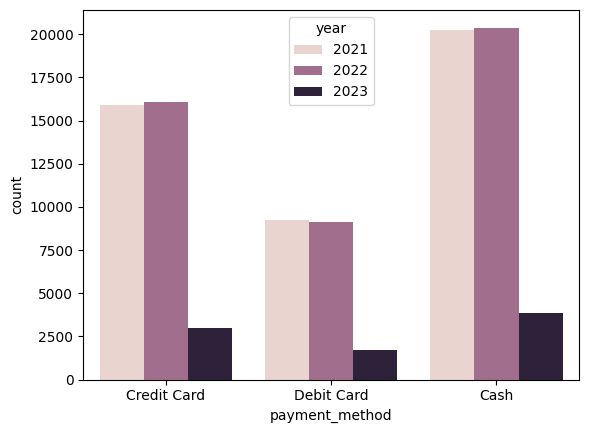

In [16]:
sns.countplot(data=df,x="payment_method",hue="year")

Here we can seen that maximum coustmer prefer cash as a payment method 
then in online method of payment credit card most use compare to debit card all years data has same ratio of payment method

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

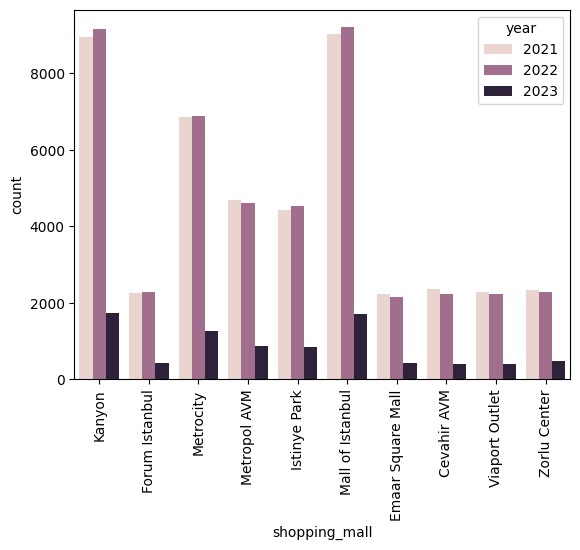

In [17]:
sns.countplot(data=df,x="shopping_mall",hue="year")
plt.xticks(rotation=90)
df["shopping_mall"].unique()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

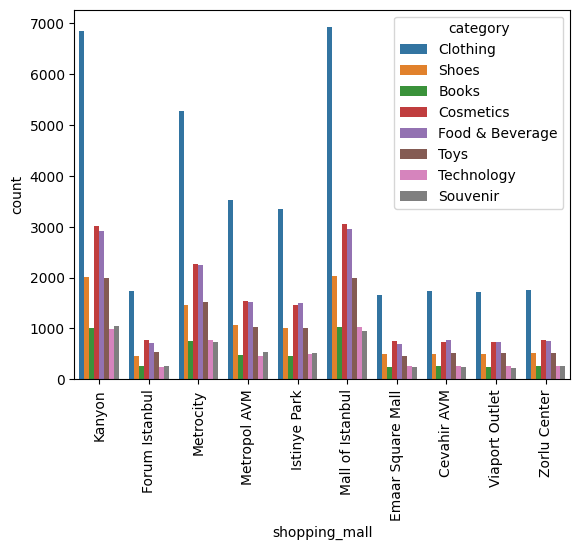

In [18]:
sns.countplot(data=df,x="shopping_mall",hue="category")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

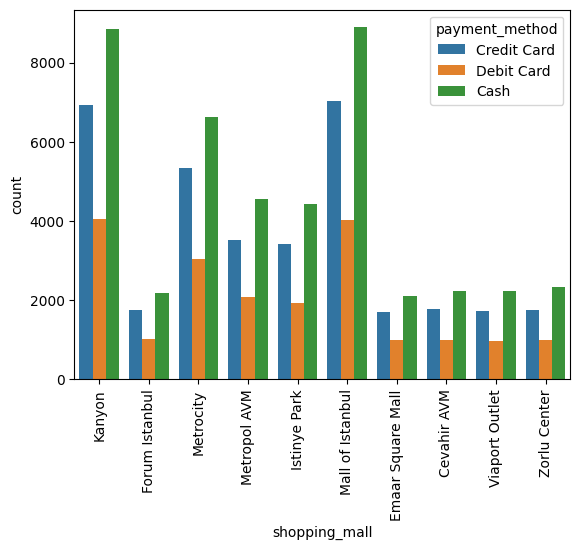

In [19]:
sns.countplot(data=df,x="shopping_mall",hue="payment_method")
plt.xticks(rotation=90)

<Axes: xlabel='shopping_mall'>

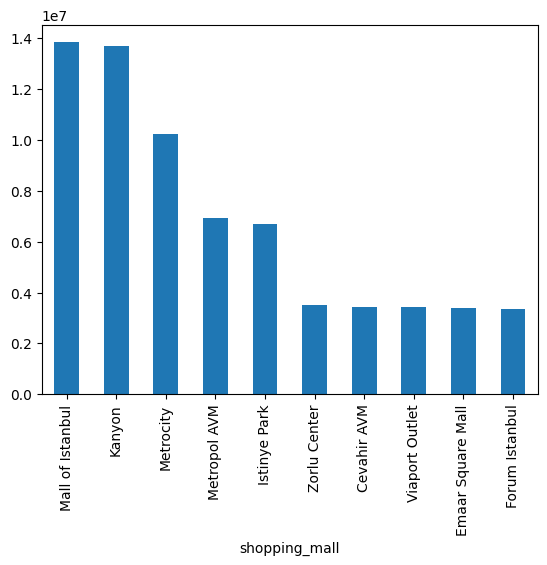

In [51]:
df.groupby("shopping_mall")["price"].sum().sort_values(ascending=False).plot(kind="bar")

1. which shopping mall sales more faviorate of coustmer? -Mall of Istanbul,Kanyon

2. which give more reveneu? -Mall of Istanbul,Kanyon
is every year have same ratio of coustmer choosing shopping_mall? -Yes
3. which categogy has the highest sales in which mall? -all categories are selling in the same ratio in all malls
-payment method also have same ratio in all mall

In [21]:
reference_date=df["invoice_date"].max() + timedelta(days=1)
recency_df=df.groupby("customer_id").agg(last_purchase_date=("invoice_date",'max')).reset_index()
recency_df["Recency"]=(reference_date - recency_df["last_purchase_date"])
final_recency=recency_df[['customer_id','Recency']]
Recency=("invoice_date",lambda x:(reference_date - x.max()).days)

In [22]:
rfm_df = df.groupby('customer_id').agg(
    Recency=("invoice_date",lambda x:(reference_date - x.max()).days),
    frequency=("invoice_no","nunique"),
    Monetary=("price","sum"))
print(rfm_df)

             Recency  frequency  Monetary
customer_id                              
C100004          737          1   1500.40
C100005          275          1   1200.34
C100006          690          1    107.52
C100012          840          1     26.15
C100019          861          1     35.84
...              ...        ...       ...
C999886          122          1     15.69
C999910          571          1     45.45
C999974          424          1   1500.40
C999976          531          1    107.52
C999995          856          1    600.16

[99457 rows x 3 columns]


In [23]:
import pandas as pd
from datetime import timedelta

# (df is already loaded and invoice_date is converted)
# Set the Reference Date (day after the max invoice_date)
reference_date = df['invoice_date'].max() + timedelta(days=1)

# Group by customer_id to get the final features (since all are unique, this is simple aggregation)
final_customer_df = df.groupby('customer_id').agg(
    # Recency: Days since last purchase (which is their only purchase)
    Recency=('invoice_date', lambda x: (reference_date - x.max()).days),
    # Monetary: Total spending (sum of their only purchase)
    Monetary=('price', 'sum'),
    # Other features needed for profiling/prediction
    Gender=('gender', 'first'),
    Age=('age', 'first'),
    Category=('category', 'first'),
    Payment_Method=('payment_method', 'first'),
    Shopping_Mall=('shopping_mall', 'first')
).reset_index()

# Display the head of the new customer-level data
print(final_customer_df.head())

# Save the customer-level data for the next step (Modeling)
final_customer_df.to_csv('customer_profiling_data.csv', index=False)

  customer_id  Recency  Monetary  Gender  Age         Category Payment_Method  \
0     C100004      737   1500.40    Male   61         Clothing    Credit Card   
1     C100005      275   1200.34    Male   34            Shoes           Cash   
2     C100006      690    107.52    Male   44             Toys    Credit Card   
3     C100012      840     26.15    Male   25  Food & Beverage           Cash   
4     C100019      861     35.84  Female   21             Toys    Credit Card   

  Shopping_Mall  
0     Metrocity  
1        Kanyon  
2   Cevahir AVM  
3        Kanyon  
4     Metrocity  


data cleaning and one-hot-encoding for contineous target data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor	

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,r2_score

In [25]:
la=LabelEncoder()
final_customer_df["Gender"]=la.fit_transform(final_customer_df["Gender"])
final_customer_df = pd.get_dummies(final_customer_df,columns=["Category","Payment_Method","Shopping_Mall"])




In [26]:
final_customer_df.drop(columns="customer_id",inplace=True)

In [27]:
x=final_customer_df.drop("Monetary",axis=1)
y=final_customer_df["Monetary"]
numerical_cols_to_scale = ['Recency', 'Age']
scaler = StandardScaler()
x[numerical_cols_to_scale] = scaler.fit_transform(x[numerical_cols_to_scale])


In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)	

model.fit(X_train,y_train)
y_pred =model.predict(X_test)



In [29]:
print("mean square Error:",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

mean square Error: 276379.7271023724
r2 score 0.6974431931802483


here we using Random forest regression model  and predict monetary  using age,gender shopping mall,payment method  
and mean square error is 276379.7271023724
and r2 score is 0.69 

👇👇now below we build model for noncontinous column 
our target column is category

In [30]:
final_customer_df


,Recency,Monetary,Gender,Age,Category_Books,Category_Clothing,Category_Cosmetics,Category_Food & Beverage,Category_Shoes,Category_Souvenir,...,Shopping_Mall_Cevahir AVM,Shopping_Mall_Emaar Square Mall,Shopping_Mall_Forum Istanbul,Shopping_Mall_Istinye Park,Shopping_Mall_Kanyon,Shopping_Mall_Mall of Istanbul,Shopping_Mall_Metrocity,Shopping_Mall_Metropol AVM,Shopping_Mall_Viaport Outlet,Shopping_Mall_Zorlu Center
0,737,1500.40,1,61,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,275,1200.34,1,34,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,690,107.52,1,44,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,840,26.15,1,25,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,861,35.84,0,21,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,122,15.69,1,61,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
99453,571,45.45,1,41,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
99454,424,1500.40,0,29,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
99455,531,107.52,0,49,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [31]:
print(final_customer_df.columns)
final_customer_df.drop(columns="Monetary",inplace=True)

Index(['Recency', 'Monetary', 'Gender', 'Age', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Food & Beverage',
       'Category_Shoes', 'Category_Souvenir', 'Category_Technology',
       'Category_Toys', 'Payment_Method_Cash', 'Payment_Method_Credit Card',
       'Payment_Method_Debit Card', 'Shopping_Mall_Cevahir AVM',
       'Shopping_Mall_Emaar Square Mall', 'Shopping_Mall_Forum Istanbul',
       'Shopping_Mall_Istinye Park', 'Shopping_Mall_Kanyon',
       'Shopping_Mall_Mall of Istanbul', 'Shopping_Mall_Metrocity',
       'Shopping_Mall_Metropol AVM', 'Shopping_Mall_Viaport Outlet',
       'Shopping_Mall_Zorlu Center'],
      dtype='object')


In [32]:
final_customer_df.drop(columns=["Category_Books",'Category_Cosmetics', 'Category_Food & Beverage',
       'Category_Shoes', 'Category_Souvenir', 'Category_Technology',
       'Category_Toys'],inplace=True)



In [34]:
x_category=final_customer_df.drop("Category_Clothing",axis=1)
y_category=final_customer_df["Category_Clothing"]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(x_category,y_category)

#Model traning
models={
    "Logistic Reggression":LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=100,max_depth=5,random_state=45)
}
#check accuracy


for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"**{name}:Accuracy = {acc:.4f}")
    print(" ")
    cr=classification_report(y_test,y_pred)
    print(f"{name}:- clasification report")
    print(cr)
    



**Logistic Reggression:Accuracy = 0.6512
 
Logistic Reggression:- clasification report
              precision    recall  f1-score   support

       False       0.65      1.00      0.79     16191
        True       0.00      0.00      0.00      8674

    accuracy                           0.65     24865
   macro avg       0.33      0.50      0.39     24865
weighted avg       0.42      0.65      0.51     24865



c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

**Decision Tree:Accuracy = 0.5504
 
Decision Tree:- clasification report
              precision    recall  f1-score   support

       False       0.66      0.65      0.65     16191
        True       0.36      0.36      0.36      8674

    accuracy                           0.55     24865
   macro avg       0.51      0.51      0.51     24865
weighted avg       0.55      0.55      0.55     24865

**KNN:Accuracy = 0.5864
 
KNN:- clasification report
              precision    recall  f1-score   support

       False       0.65      0.77      0.71     16191
        True       0.36      0.24      0.29      8674

    accuracy                           0.59     24865
   macro avg       0.51      0.51      0.50     24865
weighted avg       0.55      0.59      0.56     24865

**Random Forest:Accuracy = 0.6512
 
Random Forest:- clasification report
              precision    recall  f1-score   support

       False       0.65      1.00      0.79     16191
        True       0.00      0.00     

c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

here we predict category clothing column using 4 model and every model have different accuracy 
and logical regression gave high accuracy 

And here is final conclusion of that data analysis 

1. Most sales volume might come from Clothing, but Technology drives the highest spending.
Recommendation : focused on marketing effort we can give coustomer offer 
for every clotthing purchase give 10% off on technology product

2. Recency , in this data i seen recency was too high 
we can said recency is biggest spending factor 
need to give more offer to coustomer give them coupne or need to increment in marketing

3. Age is a significant spending factor, but its influence is not linear.
  - 35−55 year olds people should receive premium product advertising and invitations to VIP mall events.
  - 18−25 year olds people should receive social media campaigns focusing on discounts and trending low-cost items to encourage frequency.

4. To increase the average bill, the business should focus on pushing Technology and Shoes, as they are the biggest spending drivers.

5. Mall of Istanbul,Kanyon that two mall gave high sales then other so might be due to location so 
suggestion should be give them offer so they frequently come in that mall

6. coustomer spend money mostly by cash and their second choise is credit card 
so give them credit card related offer so they can purchase item without hestitation of money 
so might be it can help to increment sales




